In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [21]:
observations = 100 # m

x_i =np.random.uniform(low=0, high=10, size=(observations,1))
x_i = np.sort(x_i, axis=0)

In [22]:
noise = np.random.uniform(-100,100,(observations,1))
alfa_true = 2
beta_true = 3
gamma_true = 8
targets = alfa_true + x_i*beta_true + gamma_true*x_i*x_i + noise 

## Gradient Descent Solution:


In [23]:
loss_Adam = []

learning_rate = 0.01

r = np.zeros(3)

s = np.zeros(3)

eps = 10**(-8)

Theta = np.array([0.17923125,0.10416243,0.12899188])

rho1 = 0.9
rho2 =0.999

t = 0

In [24]:
for i in range(2000):
    
    #Adam
    
    outputs_Adam = (x_i*x_i*Theta[2]) + (x_i*Theta[1]) + Theta[0]
    deltas_Adam = outputs_Adam - targets
    
    loss = sum(deltas_Adam**2)/2/observations
    loss_Adam.append(loss[0])
    
    deltas_scaled_Adam = deltas_Adam/ observations
    
    g = np.array([np.sum(deltas_scaled_Adam),np.dot(x_i.T,deltas_scaled_Adam)[0][0],np.dot((x_i*x_i).T,deltas_scaled_Adam)[0][0]])
    
    t += 1
    
    s = np.add(np.multiply(rho1,s),np.multiply((1-rho1),g))
    
    r =np.add(np.multiply(rho2,r),np.multiply(np.multiply(g,g),(1-rho2)))
    
    s_cap = np.divide(s,(1-rho1**t))          
    
    r_cap = np.divide(r,(1-rho2**t))
    
    DeltaTheta = -np.multiply(learning_rate,np.divide(s_cap,np.add(eps, np.sqrt(r_cap))))
    
    
    Theta += DeltaTheta
    

In [25]:
#print(alfa_gd,beta_gd, gamma_gd)
print(Theta)

[6.08089485 6.82169376 7.14251003]


In [26]:
#y_GD = alfa_gd + beta_gd*x_i + gamma_gd*x_i*x_i
y_Ada = Theta[0] + Theta[1]*x_i + Theta[2]*x_i*x_i

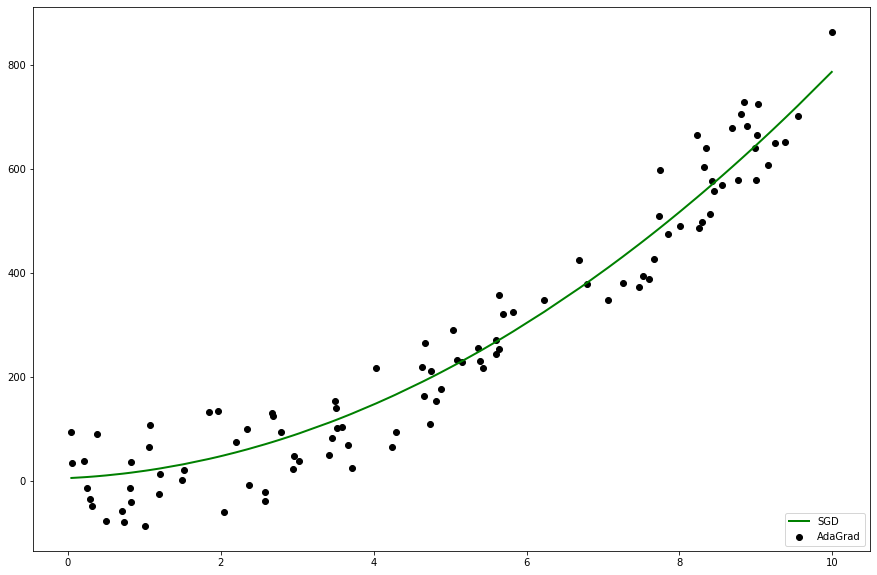

In [27]:
plt.figure(figsize=(15,10))
plt.scatter(x_i, targets, marker='o', color='black' )
#plt.plot(x_i,y_GD, color='red',linewidth=4)
plt.plot(x_i,y_Ada, color='green',linewidth=2)
plt.legend(( 'SGD','AdaGrad','targets'),loc='lower right')

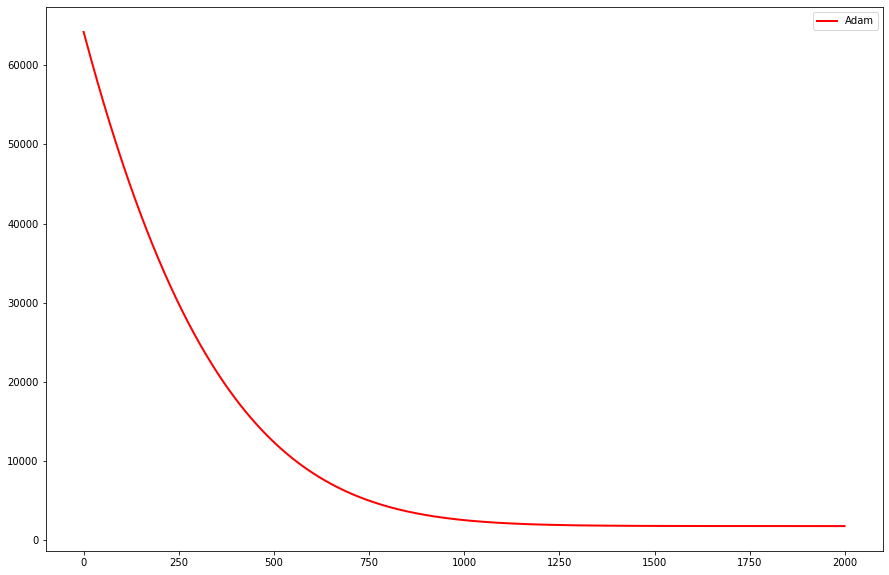

In [35]:
plt.figure(figsize=(15,10))
plt.plot(range(0,len(loss_Adam)),loss_Adam, color='red',linewidth=2)
plt.legend(('Adam',''),loc='upper right')